In [7]:
%pip install -U  dask[complete]==2021.03.0 numpy==1.19.5 pandas==1.3.5 pyarrow==1.0.1 modin

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached modin-0.17.1-py3-none-any.whl (970 kB)
  Using cached modin-0.17.0-py3-none-any.whl (962 kB)
  Using cached modin-0.16.2-py3-none-any.whl (957 kB)
  Using cached modin-0.16.1-py3-none-any.whl (956 kB)
  Using cached modin-0.16.0-py3-none-any.whl (956 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
koalas 1.7.0 requires pandas<1.2.0,>=0.23.2, but you have pandas 1.3.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from distributed import Client
client = Client()
import modin.pandas as pd
from modin.config import Engine
Engine.put("dask")

/home/dbsantos/anaconda3/envs/py39/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42667 instead
  warnings.warn(


In [2]:

df = pd.read_parquet('./yellow_tripdata_2024-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


### Dataset dict:

- **Vendor**: ID A code indicating the TPEP provider that provided the record. 
    1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- **tpep_pickup_datetime**: The date and time when the meter was engaged.
- **tpep_dropoff_datetime**: The date and time when the meter was disengaged.
- **Passenger_count**: The number of passengers in the vehicle.This is a driver-entered value.
- **Trip_distance**: The elapsed trip distance in miles reported by the taximeter.
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged
- **RateCodeID**: The final rate code in effect at the end of the trip.
    1= Standard rate
    2=JFK
    3=Newark
    4=Nassau or Westchester
    5=Negotiated fare
    6=Group ride
- **Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle
    memory before sending to the vendor, aka “store and forward,”
    because the vehicle did not have a connection to the server.
    Y= store and forward trip
    N= not a store and forward trip
- **Payment_type** A numeric code signifying how the passenger paid for the trip.
    1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip
- **Fare_amount** The time-and-distance fare calculated by the meter.
- **Extra** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- **MTA_tax**: $$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- **Improvement_surcharge** $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015.
- **Tip_amount** Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.
- **Tolls_amount** Total amount of all tolls paid in trip.
- **Total_amount** The total amount charged to passengers. Does not include cash tips.
- **Congestion_Surcharge** Total amount collected in trip for NYS congestion surcharge.
- **Airport_fee** $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [3]:
numerical_var = df[['fare_amount','passenger_count', 'extra', 'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_fee']]
numerical_var.describe()

,fare_amount,passenger_count,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.964624e+06,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06
mean,1.817506e+01,1.339281e+00,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01
std,1.894955e+01,8.502817e-01,1.804102e+00,1.177600e-01,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01
min,-8.990000e+02,0.000000e+00,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00
25%,8.600000e+00,1.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00
50%,1.280000e+01,1.000000e+00,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00
75%,2.050000e+01,1.000000e+00,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,5.000000e+03,9.000000e+00,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00


In [8]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.5 MB/s eta 0:00:00m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


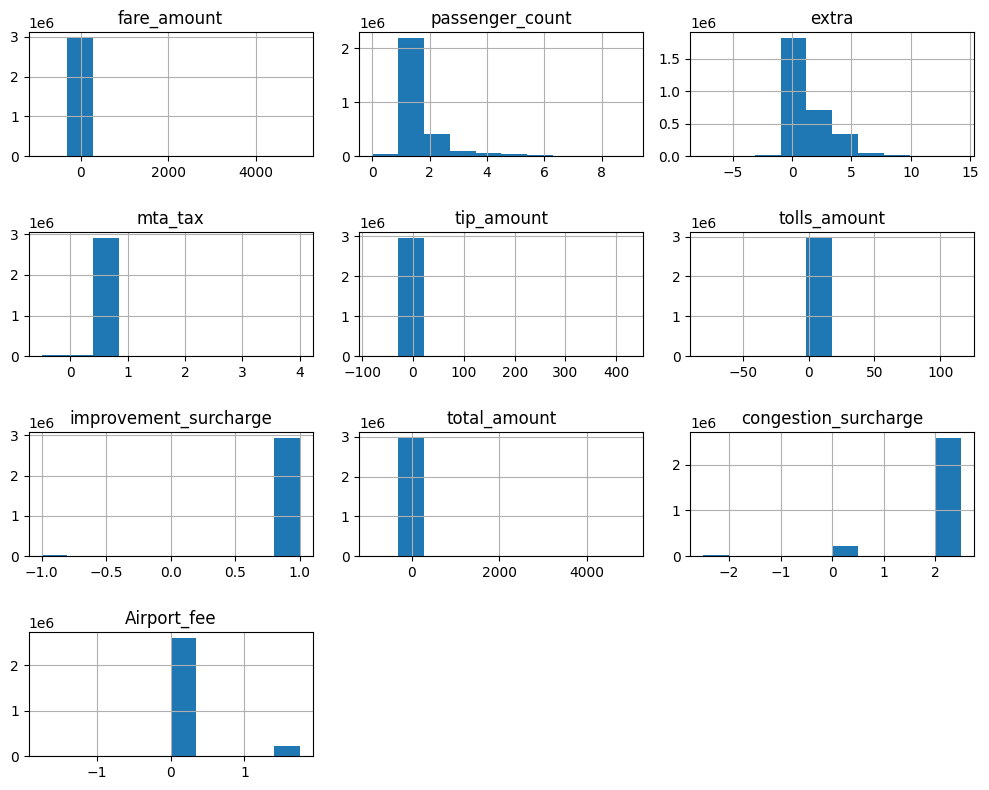

In [5]:
import matplotlib.pyplot as plt

# Convert Modin DataFrame to pandas DataFrame for plotting
num_df_pandas = numerical_var._to_pandas()

# Plot histograms for all numerical columns
num_df_pandas.hist(bins=10, figsize=(10, 8), layout=(4, 3))
plt.tight_layout()
plt.show()

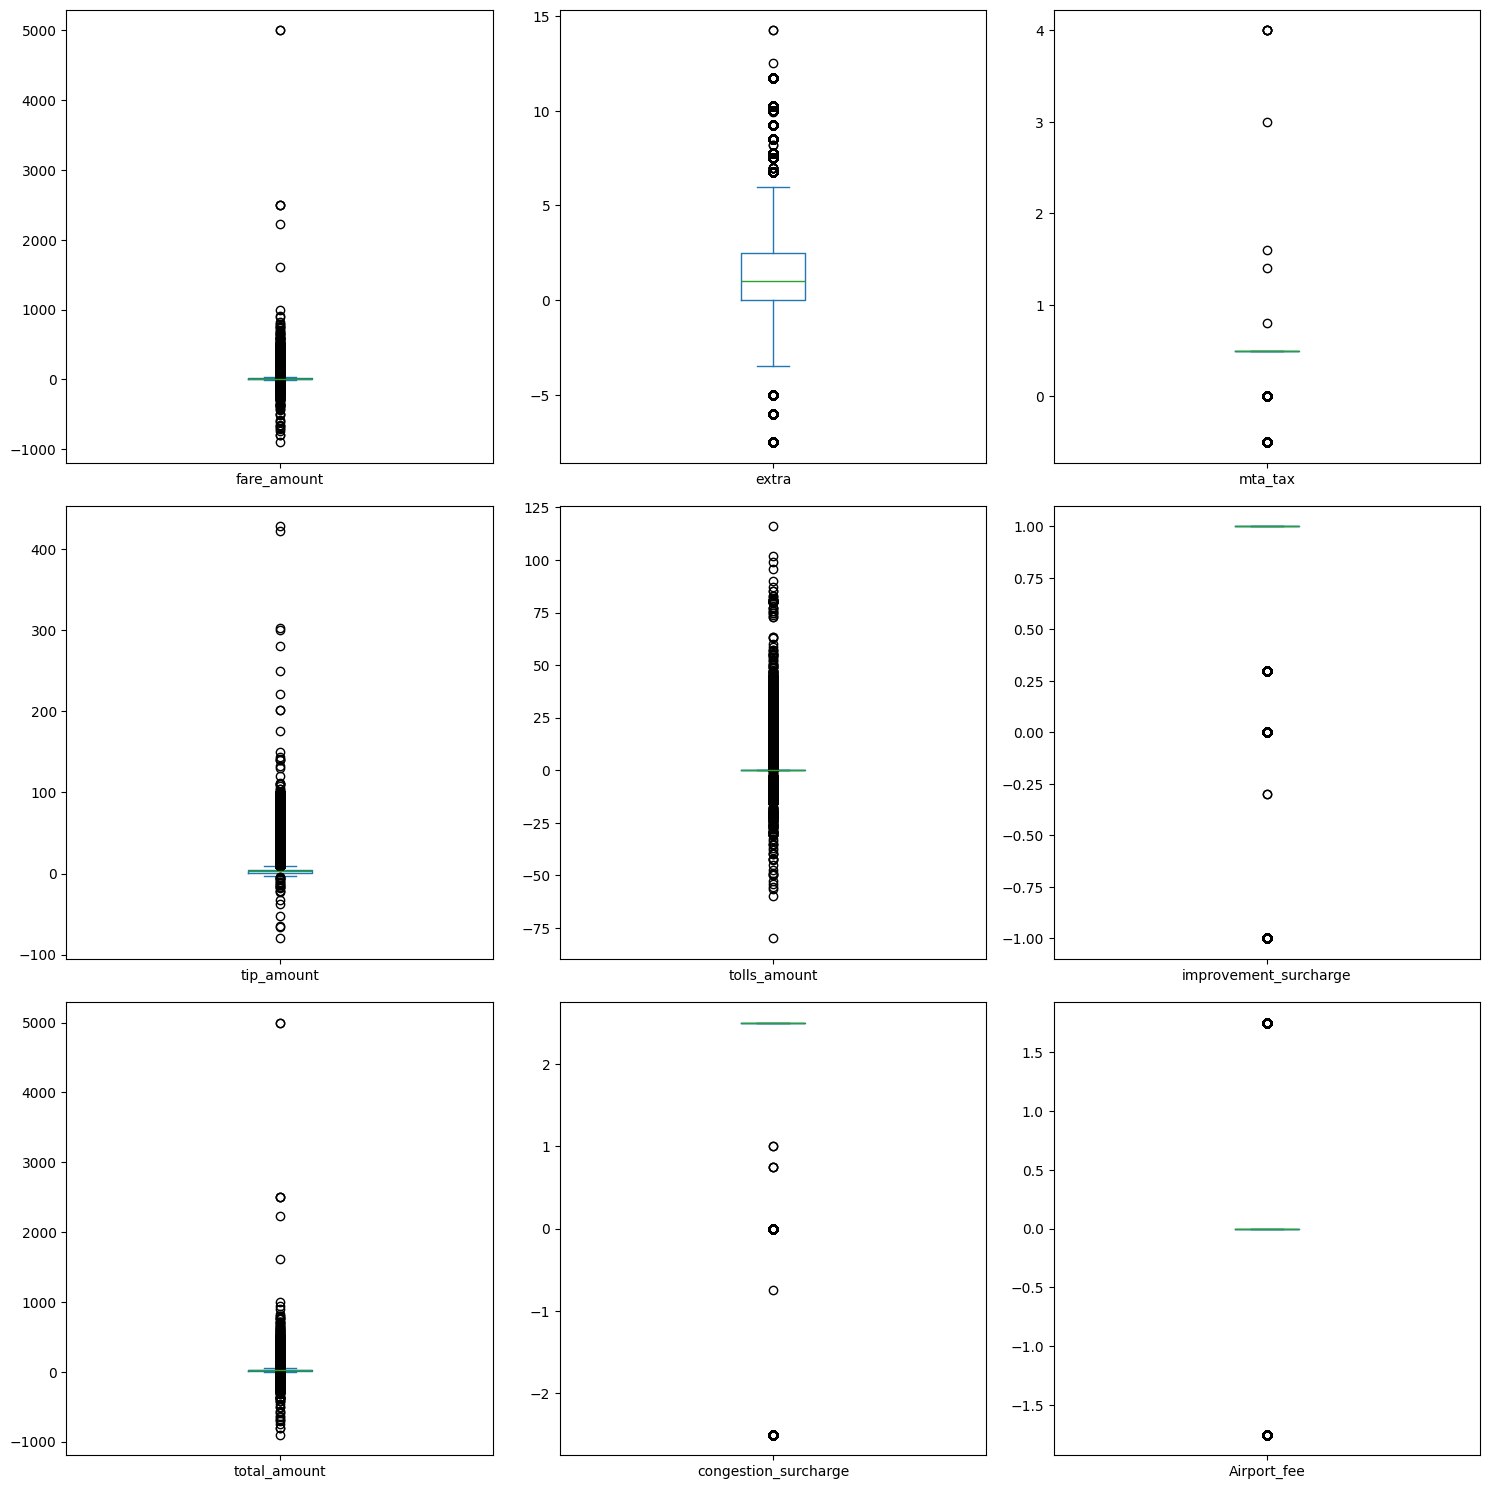

In [32]:
# Plot boxplots for each numerical column in different subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col in enumerate(num_df_pandas.columns):
    ax = axes[i // 3, i % 3]  # Calculate the row and column index
    num_df_pandas[col].plot(kind='box', ax=ax)

plt.tight_layout()

plt.show()

In [6]:
num_df_pandas = num_df_pandas[num_df_pandas[['fare_amount','congestion_surcharge','Airport_fee','improvement_surcharge','extra']]>=0]
num_df_pandas

,fare_amount,passenger_count,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,17.70,NaN,1.00,NaN,NaN,NaN,1.0,NaN,2.5,0.0
1,10.00,NaN,3.50,NaN,NaN,NaN,1.0,NaN,2.5,0.0
2,23.30,NaN,3.50,NaN,NaN,NaN,1.0,NaN,2.5,0.0
3,10.00,NaN,3.50,NaN,NaN,NaN,1.0,NaN,2.5,0.0
4,7.90,NaN,3.50,NaN,NaN,NaN,1.0,NaN,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...
2964619,15.77,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2964620,18.40,NaN,1.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2964621,19.97,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2964622,23.88,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [34]:
num_df_pandas.describe()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.927176e+06,2.947076e+06,0.0,0.0,0.0,2.929122e+06,0.0,2.795637e+06,2.819541e+06
mean,1.865159e+01,1.471626e+00,NaN,NaN,NaN,9.995767e-01,NaN,2.305160e+00,1.444618e-01
std,1.834186e+01,1.787433e+00,NaN,NaN,NaN,1.954317e-02,NaN,6.701747e-01,4.816005e-01
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,8.600000e+00,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,2.500000e+00,0.000000e+00
50%,1.280000e+01,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,2.500000e+00,0.000000e+00
75%,2.050000e+01,2.500000e+00,NaN,NaN,NaN,1.000000e+00,NaN,2.500000e+00,0.000000e+00
max,5.000000e+03,1.425000e+01,NaN,NaN,NaN,1.000000e+00,NaN,2.500000e+00,1.750000e+00


In [7]:
numerical_var_above_zero = numerical_var[numerical_var['fare_amount']>0]

In [22]:
numerical_var_above_zero.describe()

,passenger_count,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.788237e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.788237e+06,2.788237e+06
mean,1.339377e+00,1.865728e+01,1.482017e+00,4.952188e-01,3.378398e+00,5.397967e-01,9.997243e-01,2.745546e+01,2.311185e+00,1.460555e-01
std,8.517634e-01,1.834176e+01,1.789426e+00,4.894230e-02,3.897155e+00,2.121197e+00,1.531143e-02,2.259349e+01,6.605936e-01,4.840092e-01
min,0.000000e+00,1.000000e-02,-2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.548000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.730000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.140000e+00,0.000000e+00,1.000000e+00,2.880000e+01,2.500000e+00,0.000000e+00
max,9.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00


In [16]:
#pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:004.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import seaborn as sns

correlation_matrix = numerical_var_above_zero.corr()
fare_amount_correlation = correlation_matrix["fare_amount"].drop("fare_amount")

# Select features based on correlation thresholds
threshold = 0.5  # Set your correlation threshold here
highly_correlated_features = fare_amount_correlation[fare_amount_correlation>0.5]
# Display highly correlated features
print("Highly correlated features:", highly_correlated_features)

Highly correlated features: tip_amount      0.562694
tolls_amount    0.593776
total_amount    0.977800
Airport_fee     0.563701
Name: fare_amount, dtype: float64


In [18]:
fare_amount_correlation[fare_amount_correlation>0.5]

tip_amount      0.562694
tolls_amount    0.593776
total_amount    0.977800
Airport_fee     0.563701
Name: fare_amount, dtype: float64

In [19]:
highly_correlated_features = highly_correlated_features.index.values.tolist()

In [21]:
highly_correlated_features.append('fare_amount')
selected_features = numerical_var_above_zero[highly_correlated_features]
selected_features.describe()

,tip_amount,tolls_amount,total_amount,Airport_fee,fare_amount
count,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06,2.926283e+06
mean,3.378398e+00,5.397967e-01,2.745546e+01,1.391654e-01,1.865728e+01
std,3.897155e+00,2.121197e+00,2.259349e+01,4.734686e-01,1.834176e+01
min,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,1.000000e-02
25%,1.000000e+00,0.000000e+00,1.548000e+01,0.000000e+00,8.600000e+00
50%,2.730000e+00,0.000000e+00,2.016000e+01,0.000000e+00,1.280000e+01
75%,4.140000e+00,0.000000e+00,2.880000e+01,0.000000e+00,2.050000e+01
max,4.280000e+02,1.159200e+02,5.000000e+03,1.750000e+00,5.000000e+03


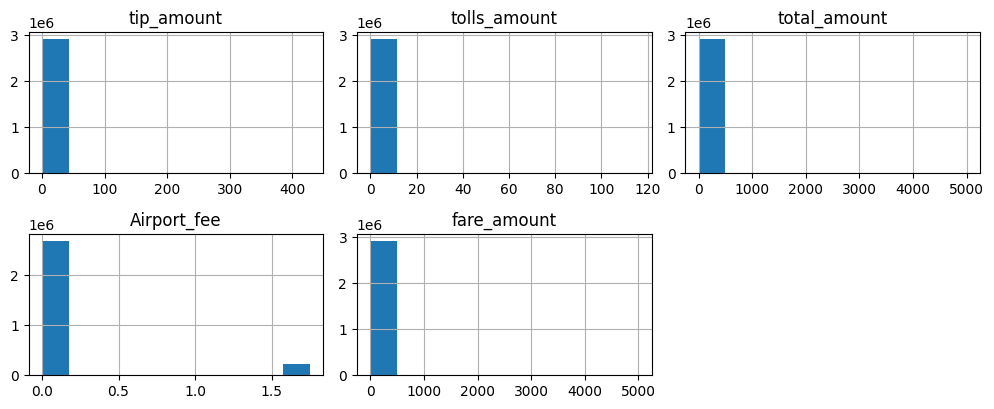

In [92]:
# Convert Modin DataFrame to pandas DataFrame for plotting
num_df_pandas = selected_features._to_pandas()

# Plot histograms for all numerical columns
num_df_pandas.hist(bins=10, figsize=(10, 8), layout=(4, 3))
plt.tight_layout()
plt.show()

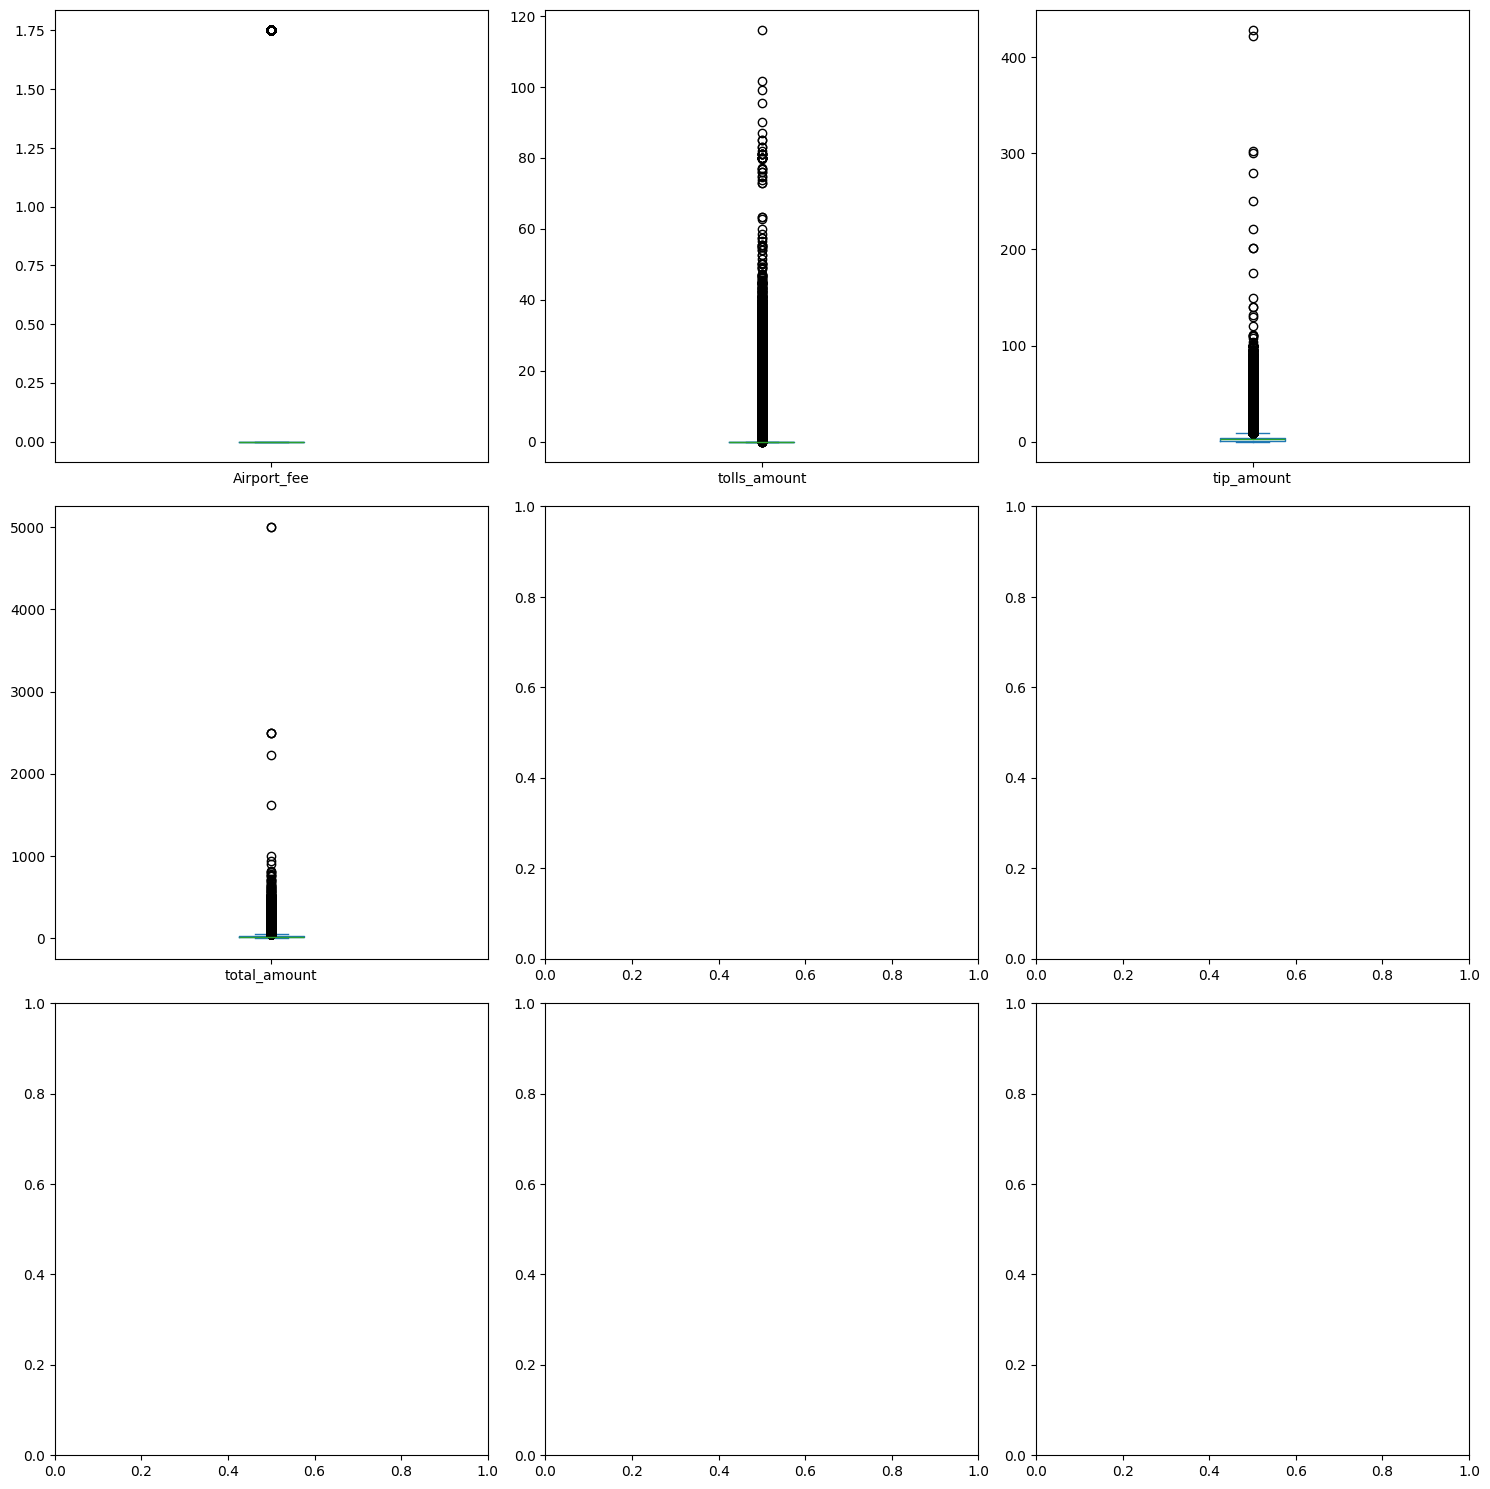

In [40]:
# Plot boxplots for each numerical column in different subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col in enumerate(num_df_pandas.columns):
    ax = axes[i // 3, i % 3]  # Calculate the row and column index
    num_df_pandas[col].plot(kind='box', ax=ax)

plt.tight_layout()

plt.show()

In [22]:
selected_features

,tip_amount,tolls_amount,total_amount,Airport_fee,fare_amount
0,0.00,0.00,22.70,0.0,17.70
1,3.75,0.00,18.75,0.0,10.00
2,3.00,0.00,31.30,0.0,23.30
3,2.00,0.00,17.00,0.0,10.00
4,3.20,0.00,16.10,0.0,7.90
...,...,...,...,...,...
2964619,2.00,0.00,21.77,0.0,15.77
2964620,2.34,0.00,25.74,0.0,18.40
2964621,0.00,0.00,23.97,0.0,19.97
2964622,5.58,0.00,33.46,0.0,23.88


In [23]:
bins = [-float("inf"), 10, 20, float("inf")]
labels = ['Low', 'Medium', 'High']
selected_features['fare_discretized'] = pd.cut(selected_features['fare_amount'], bins=bins, labels=labels, right=False)

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


In [24]:
selected_features

,tip_amount,tolls_amount,total_amount,Airport_fee,fare_amount,fare_discretized
0,0.00,0.00,22.70,0.0,17.70,Medium
1,3.75,0.00,18.75,0.0,10.00,Medium
2,3.00,0.00,31.30,0.0,23.30,High
3,2.00,0.00,17.00,0.0,10.00,Medium
4,3.20,0.00,16.10,0.0,7.90,Low
...,...,...,...,...,...,...
2964619,2.00,0.00,21.77,0.0,15.77,Medium
2964620,2.34,0.00,25.74,0.0,18.40,Medium
2964621,0.00,0.00,23.97,0.0,19.97,Medium
2964622,5.58,0.00,33.46,0.0,23.88,High


In [25]:
selected_features_1000 = selected_features[:1000]

In [26]:
X_reg = selected_features[['tip_amount','tolls_amount','total_amount','Airport_fee']]
y_reg = selected_features['fare_amount']
X_cls = selected_features[['tip_amount','tolls_amount','total_amount','Airport_fee']]
y_cls = selected_features['fare_discretized']

In [100]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install yappi

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
import yappi

In [28]:
yappi.start()
df = pd.read_parquet('./yellow_tripdata_2024-01.parquet')
numerical_var = df[['fare_amount','passenger_count', 'extra', 'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_fee']]
num_df_pandas = numerical_var._to_pandas()
num_df_pandas = num_df_pandas[num_df_pandas[['fare_amount','congestion_surcharge','Airport_fee','improvement_surcharge','extra']]>=0]
numerical_var_above_zero = numerical_var[numerical_var['fare_amount']>0]

correlation_matrix = numerical_var_above_zero.corr()
fare_amount_correlation = correlation_matrix["fare_amount"].drop("fare_amount")

# Select features based on correlation thresholds
threshold = 0.5  # Set your correlation threshold here
highly_correlated_features = fare_amount_correlation[fare_amount_correlation>0.5]

highly_correlated_features = highly_correlated_features.index.values.tolist()

highly_correlated_features.append('fare_amount')
selected_features = numerical_var_above_zero[highly_correlated_features]
selected_features.describe()

bins = [-float("inf"), 10, 20, float("inf")]
labels = ['Low', 'Medium', 'High']
selected_features['fare_discretized'] = pd.cut(selected_features['fare_amount'], bins=bins, labels=labels, right=False)

# Step 3: Training and Validation
# Regression (XGBRegressor)
xgb_reg = XGBRegressor()
params_reg = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
grid_reg = GridSearchCV(xgb_reg, params_reg, cv=5)
grid_reg.fit(X_reg, y_reg)
best_reg_model = grid_reg.best_estimator_

# Classification (Logistic Regression)
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)
log_reg = LogisticRegression()
params_cls = {'C': [0.1, 1, 10]}
grid_cls = GridSearchCV(log_reg, params_cls, cv=5)
grid_cls.fit(X_cls_scaled, y_cls)
best_cls_model = grid_cls.best_estimator_

# Step 4: Testing
# Example: Split data into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)


selected_features_1000 = selected_features[:1000]

X_reg = selected_features[['tip_amount','tolls_amount','total_amount','Airport_fee']]
y_reg = selected_features['fare_amount']
X_cls = selected_features[['tip_amount','tolls_amount','total_amount','Airport_fee']]
y_cls = selected_features['fare_discretized']

# Evaluate regression model
reg_predictions = best_reg_model.predict(X_test_reg)
reg_rmse = mean_squared_error(y_test_reg, reg_predictions, squared=False)

# Evaluate classification model
cls_predictions = best_cls_model.predict(X_test_cls)
cls_accuracy = accuracy_score(y_test_cls, cls_predictions)
cls_report = classification_report(y_test_cls, cls_predictions)

# Print evaluation metrics
print("Regression RMSE:", reg_rmse)
print("Classification Accuracy:", cls_accuracy)
print("Classification Report:\n", cls_report)

Regression RMSE: 3.8223562387110324
Classification Accuracy: 0.9314472103708286
Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.96      0.97    149065
         Low       0.91      0.93      0.92    178387
      Medium       0.93      0.92      0.92    257805

    accuracy                           0.93    585257
   macro avg       0.93      0.94      0.93    585257
weighted avg       0.93      0.93      0.93    585257



In [103]:
pip install dask_cudf

ERROR: Could not find a version that satisfies the requirement dask_cudf (from versions: none)
ERROR: No matching distribution found for dask_cudf
Note: you may need to restart the kernel to use updated packages.
